In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats
from scipy.stats import levene
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('C:/Users/0&1/Downloads/AmesHousing.csv')

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


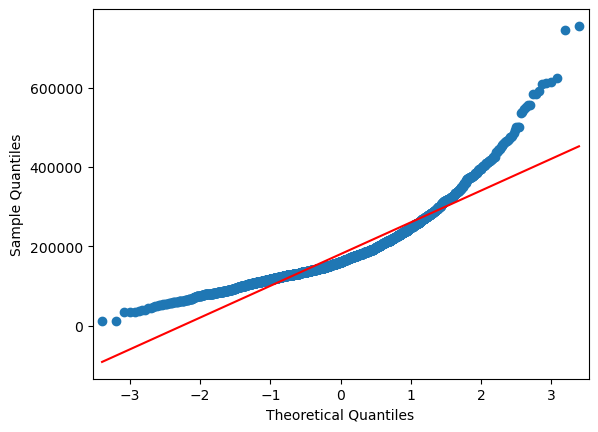

In [4]:
qqplot(df['SalePrice'],line='s')
plt.show()

In [5]:
df['SalePrice_log_t']=stats.boxcox(df['SalePrice'], 0)

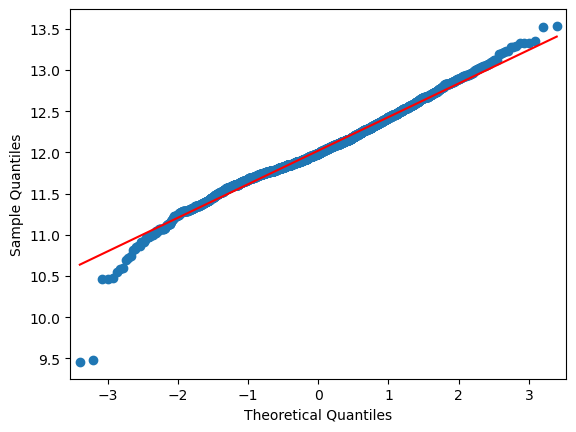

In [6]:
qqplot(df['SalePrice_log_t'],line='s')
plt.show()

In [7]:
levene(df['SalePrice_log_t'][df['Heating'] == 'GasA'],
     df['SalePrice_log_t'][df['Heating'] == 'GasW'],
     df['SalePrice_log_t'][df['Heating'] == 'Grav'],
     df['SalePrice_log_t'][df['Heating'] == 'Wall'],
     df['SalePrice_log_t'][df['Heating'] == 'Floor'],
     df['SalePrice_log_t'][df['Heating'] == 'OthW'], center='mean')

LeveneResult(statistic=1.7143617921065413, pvalue=0.1277860365745429)

In [8]:
df['Heating'].unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'Floor', 'OthW'], dtype=object)

In [9]:
Stat,p = f_oneway( df['SalePrice_log_t'][df['Heating'] == 'GasA'],
     df['SalePrice_log_t'][df['Heating'] == 'GasW'],
     df['SalePrice_log_t'][df['Heating'] == 'Grav'],
     df['SalePrice_log_t'][df['Heating'] == 'Wall'],
     df['SalePrice_log_t'][df['Heating'] == 'Floor'],
     df['SalePrice_log_t'][df['Heating'] == 'OthW']
                 )

In [10]:
print('P-value for one way anova test:',p)

P-value for one way anova test: 3.9927708306619703e-14


In [11]:
tukey = pairwise_tukeyhsd(endog=df['SalePrice_log_t'],
                          groups=df['Heating'],
                          alpha=0.05)

In [12]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Floor   GasA   0.8355 0.3017 -0.3137  1.9848  False
 Floor   GasW   0.7109 0.5102 -0.4592  1.8811  False
 Floor   Grav    0.067    1.0 -1.1443  1.2782  False
 Floor   OthW   0.5503 0.8753  -0.857  1.9576  False
 Floor   Wall  -0.1069 0.9999  -1.348  1.1342  False
  GasA   GasW  -0.1246 0.5989 -0.3468  0.0975  False
  GasA   Grav  -0.7686    0.0 -1.1522  -0.385   True
  GasA   OthW  -0.2853 0.9178 -1.0981  0.5275  False
  GasA   Wall  -0.9425    0.0 -1.4121 -0.4729   True
  GasW   Grav   -0.644 0.0005 -1.0862 -0.2017   True
  GasW   OthW  -0.1607 0.9943 -1.0027  0.6814  False
  GasW   Wall  -0.8179 0.0001 -1.3365 -0.2993   True
  Grav   OthW   0.4833  0.642 -0.4149  1.3816  False
  Grav   Wall  -0.1739 0.9642 -0.7795  0.4317  False
  OthW   Wall  -0.6572 0.3439 -1.5954   0.281  False
----------------------------------------------